In [1]:
from utils import *
from MySolution import MyClassifier, MyClustering, MyLabelSelection


/Users/yiranwang/UCLA-courses/ECE236A/ECE236A-Project/Code/MySolution.py:449: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if task is 2:
/Users/yiranwang/UCLA-courses/ECE236A/ECE236A-Project/Code/MySolution.py:482: SyntaxWarning: "is" with a literal. Did you mean "=="?
  elif task is 1:


Synthetic data shape:  (1000, 2) (1000,)


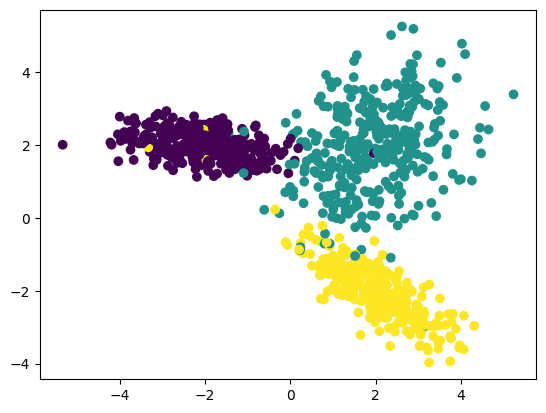

In [2]:
# Get datasets
syn_data = prepare_synthetic_data()
print("Synthetic data shape: ", syn_data['trainX'].shape, syn_data['trainY'].shape)

plt.scatter(syn_data['trainX'][:, 0], syn_data['trainX'][:, 1], c=syn_data['trainY'])

MNIST data shape:  (1000, 784) (1000,)


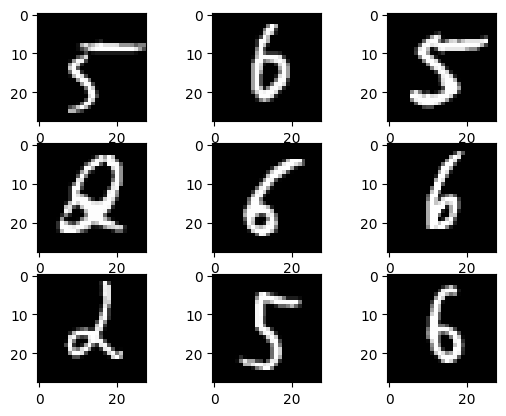

In [3]:
mnist_data = prepare_mnist_data()
print("MNIST data shape: ", mnist_data['trainX'].shape, mnist_data['trainY'].shape)

for i in range(9):	
    plt.subplot(330 + 1 + i)
    plt.imshow(mnist_data['trainX'][i].reshape(28,28), cmap='gray')
plt.show()

In [4]:
result1 = {}
syn_data = prepare_synthetic_data()
mnist_data = prepare_mnist_data()

for label, data in {'synthetic_test_accuracy': syn_data, 'mnist_test_accuracy': mnist_data}.items():
    acc_list = []
    for i in range(1):
        svm = MyClassifier(K=3, ensemble=True)
        svm.train(data['trainX'], data['trainY'])
        acc = svm.evaluate(data['testX'], data['testY'])
        acc_list.append(acc)
    acc_list = np.array(acc_list)
#     print(f"{label} mean: {np.mean(acc_list)}, variance: {np.var(acc_list)}")
    result1[label] = np.mean(acc_list)
result1

/opt/homebrew/lib/python3.11/site-packages/cvxpy/reductions/solvers/solving_chain.py:336: FutureWarning: 
    Your problem is being solved with the ECOS solver by default. Starting in 
    CVXPY 1.5.0, Clarabel will be used as the default solver instead. To continue 
    using ECOS, specify the ECOS solver explicitly using the ``solver=cp.ECOS`` 
    argument to the ``problem.solve`` method.
    
  warnings.warn(ECOS_DEPRECATION_MSG, FutureWarning)


====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======


/opt/homebrew/lib/python3.11/site-packages/cvxpy/reductions/solvers/solving_chain.py:336: FutureWarning: 
    Your problem is being solved with the ECOS solver by default. Starting in 
    CVXPY 1.5.0, Clarabel will be used as the default solver instead. To continue 
    using ECOS, specify the ECOS solver explicitly using the ``solver=cp.ECOS`` 
    argument to the ``problem.solve`` method.
    
  warnings.warn(ECOS_DEPRECATION_MSG, FutureWarning)


====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======


{'synthetic_test_accuracy': 0.926, 'mnist_test_accuracy': 0.878}

## Boundaries Selected by Solving SVM (Synthetic Data)

In [13]:
for label, data in {'synthetic_test_accuracy': syn_data}.items():
    acc_list = []
    for i in range(1):
        svm = MyClassifier(K=3, ensemble=True)
        svm.train(data['trainX'], data['trainY'])
        acc = svm.evaluate(data['testX'], data['testY'])
        acc_list.append(acc)

====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======


/opt/homebrew/lib/python3.11/site-packages/cvxpy/reductions/solvers/solving_chain.py:336: FutureWarning: 
    Your problem is being solved with the ECOS solver by default. Starting in 
    CVXPY 1.5.0, Clarabel will be used as the default solver instead. To continue 
    using ECOS, specify the ECOS solver explicitly using the ``solver=cp.ECOS`` 
    argument to the ``problem.solve`` method.
    
  warnings.warn(ECOS_DEPRECATION_MSG, FutureWarning)


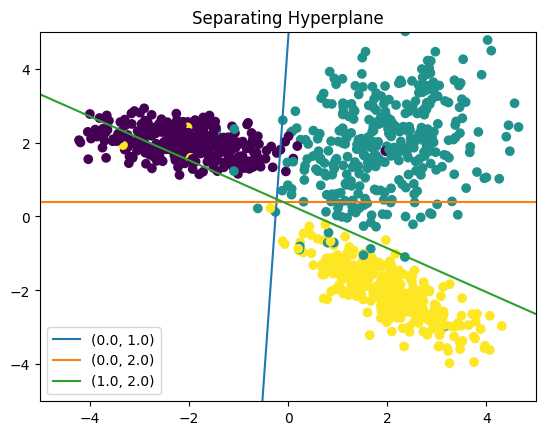

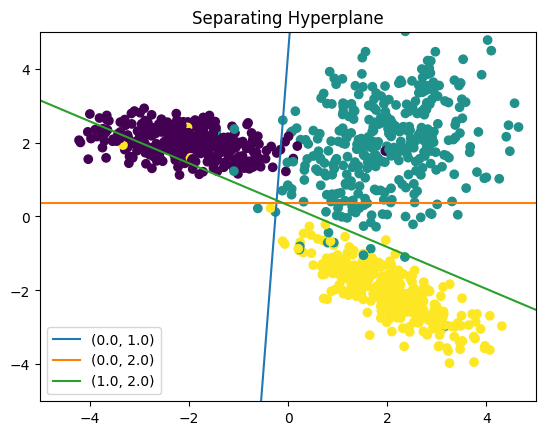

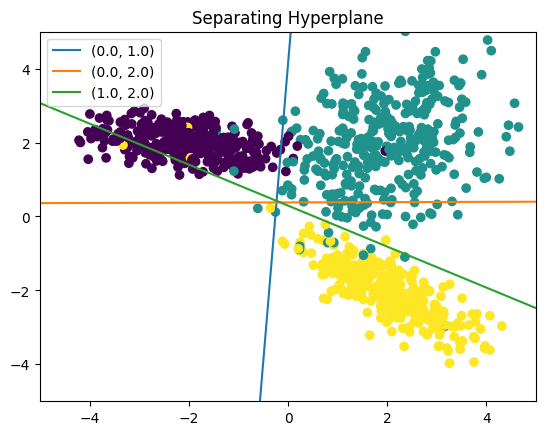

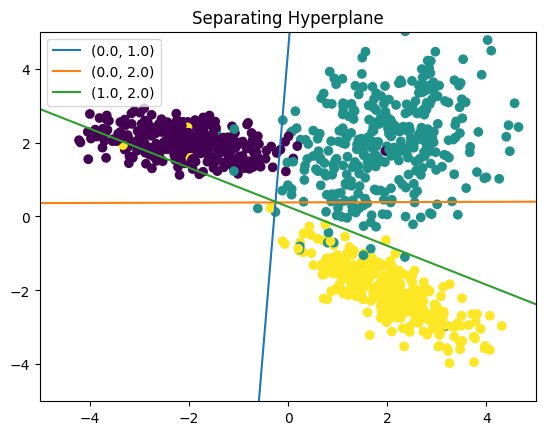

In [20]:
lams = [0.1, 0.6, 1.1, 1.6]

for lam in lams:
    plt.figure()
    plt.title("Separating Hyperplane")
    plt.xlim(-5, 5)
    plt.ylim(-5, 5)
    plt.scatter(syn_data['trainX'][:, 0], syn_data['trainX'][:, 1], c=syn_data['trainY'])
    for key in svm.SVM_table:
        if key[-1] != lam:
            continue
        key = (key[0], key[1], lam)
        w = svm.SVM_table[key][0]
        b = svm.SVM_table[key][1]
        # print(w, b)
        x = np.linspace(-5, 5, 100)
        y = (-w[0] * x - b) / w[1]
        plt.plot(x, y, label=(key[0], key[1]))
    plt.legend()

In [7]:
result2 = {}

for label, (data, K_list) in {'synthetic': (syn_data, [3, 5, 10]), 
                    'mnist': (mnist_data, [3, 10, 32])}.items():
    cur_result = {'K': K_list, 'clustering_nmi': [], 'classification_accuracy': []}
    for K in K_list:
        for i in range(1):
            nmi_list, acc_list = [], []
            kmeans = MyClustering(K=K)
            kmeans.train(data['trainX'], iteration=100)
            nmi = kmeans.evaluate_clustering(np.array(data['trainY'], dtype=int))
            acc = kmeans.evaluate_classification(
                np.array(data['trainY'], dtype=int),
                data['testX'],
                np.array(data['testY'], dtype=int)
            )
            nmi_list.append(nmi)
            acc_list.append(acc)
#         print(f"{label} nmi mean: {np.mean(acc_list)}, variance: {np.var(acc_list)}")
#         print(f"{label} acc mean: {np.mean(nmi_list)}, variance: {np.var(nmi_list)}")
        cur_result['clustering_nmi'].append(np.mean(nmi_list))
        cur_result['classification_accuracy'].append(np.mean(acc_list))
        result2[label] = cur_result
result2

******* K = 3


100% 100/100 [00:06<00:00, 15.89it/s]


******* K = 5


100% 100/100 [00:06<00:00, 16.67it/s]


******* K = 10


100% 100/100 [00:10<00:00,  9.42it/s]


******* K = 3


100% 100/100 [00:08<00:00, 12.14it/s]


******* K = 10


  2% 2/100 [00:00<00:33,  2.88it/s]/u/home/z/zhengton/.local/lib/python3.9/site-packages/cvxpy/problems/problem.py:1385: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
100% 100/100 [00:15<00:00,  6.32it/s]


******* K = 32


  0% 0/100 [00:00<?, ?it/s]/u/home/z/zhengton/.local/lib/python3.9/site-packages/cvxpy/problems/problem.py:1385: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
100% 100/100 [02:34<00:00,  1.54s/it]


{'synthetic': {'K': [3, 5, 10],
  'clustering_nmi': [0.8278254854605326,
   0.756702743714058,
   0.8271893811038394],
  'classification_accuracy': [0.968, 0.952, 0.956]},
 'mnist': {'K': [3, 10, 32],
  'clustering_nmi': [0.6410475287262708,
   0.7932531968669647,
   0.5133241346522622],
  'classification_accuracy': [0.824, 0.93, 0.86]}}

In [9]:
result3 = {}

for label, (data, percentage_list) in {'synthetic': (syn_data, [0.05,0.1,0.2,0.5,1]), 
                    'mnist': (mnist_data, [0.05,0.1,0.2,0.5,1])}.items():
    cur_result = {'label_percentage':[0.05,0.1,0.2,0.5,1], 
                  'test_accuracy(our algo)': [], 
                  'test_accuracy(random)': []}
    for percentage in percentage_list:
        acc_list_1, acc_list_2 = [], []
        for i in range(10):
            our_selectors = MyLabelSelection(percentage, algo='pseudo', K=3)
            idxs, cluster_labels = our_selectors.select(data['trainX'], True)
            model = MyClassifier(K=3, ensemble=True)
            model.train(data['trainX'][idxs], data['trainY'][idxs])
            acc = model.evaluate(data['testX'], data['testY'])
            acc_list_1.append(acc)
    
            rand_selectors = MyLabelSelection(percentage, algo='rand', K=3)
            idxs, cluster_labels = rand_selectors.select(data['trainX'], True)
            model = MyClassifier(K=3, ensemble=True)
            model.train(data['trainX'][idxs], data['trainY'][idxs])
            acc = model.evaluate(data['testX'], data['testY'])
            acc_list_2.append(acc)
        print(f"{label} our algo acc mean: {np.mean(acc_list_1)}, variance: {np.var(acc_list_1)}")
        print(f"{label} random acc mean: {np.mean(acc_list_2)}, variance: {np.var(acc_list_2)}")
        cur_result['test_accuracy(our algo)'].append(np.mean(acc_list_1))
        cur_result['test_accuracy(random)'].append(np.mean(acc_list_2))
    result3[label] = cur_result
result3

******* K = 3


100% 100/100 [00:06<00:00, 15.23it/s]


====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
******* K = 3


100% 100/100 [00:06<00:00, 16.22it/s]


====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
******* K = 3


100% 100/100 [00:06<00:00, 16.13it/s]


====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
******* K = 3


100% 100/100 [00:06<00:00, 15.91it/s]


====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
******* K = 3


100% 100/100 [00:06<00:00, 16.21it/s]


====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
******* K = 3


100% 100/100 [00:06<00:00, 15.81it/s]


====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
******* K = 3


100% 100/100 [00:06<00:00, 16.07it/s]


====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
******* K = 3


100% 100/100 [00:06<00:00, 15.65it/s]


====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
******* K = 3


100% 100/100 [00:06<00:00, 15.32it/s]


====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
******* K = 3


100% 100/100 [00:06<00:00, 15.91it/s]


====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
synthetic our algo acc mean: 0.8446000000000001, variance: 0.013746440000000002
synthetic random acc mean: 0.8542, variance: 0.015249959999999996
******* K = 3


100% 100/100 [00:06<00:00, 15.71it/s]


====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
******* K = 3


100% 100/100 [00:06<00:00, 16.36it/s]


====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
******* K = 3


100% 100/100 [00:06<00:00, 16.14it/s]


====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
******* K = 3


100% 100/100 [00:06<00:00, 15.93it/s]


====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
******* K = 3


100% 100/100 [00:06<00:00, 16.32it/s]


====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
******* K = 3


100% 100/100 [00:06<00:00, 15.96it/s]


====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
******* K = 3


100% 100/100 [00:06<00:00, 16.11it/s]


====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
******* K = 3


100% 100/100 [00:06<00:00, 16.13it/s]


====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
******* K = 3


100% 100/100 [00:06<00:00, 15.93it/s]


====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
******* K = 3


100% 100/100 [00:06<00:00, 16.10it/s]


====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
synthetic our algo acc mean: 0.9276, variance: 0.00020783999999999958
synthetic random acc mean: 0.851, variance: 0.0081426
******* K = 3


100% 100/100 [00:06<00:00, 15.99it/s]


====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
******* K = 3


100% 100/100 [00:06<00:00, 15.79it/s]


====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
******* K = 3


100% 100/100 [00:06<00:00, 16.18it/s]


====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
******* K = 3


100% 100/100 [00:06<00:00, 15.71it/s]


====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
******* K = 3


100% 100/100 [00:06<00:00, 16.19it/s]


====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
******* K = 3


100% 100/100 [00:06<00:00, 15.41it/s]


====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
******* K = 3


100% 100/100 [00:06<00:00, 16.17it/s]


====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
******* K = 3


100% 100/100 [00:06<00:00, 15.98it/s]


====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
******* K = 3


100% 100/100 [00:06<00:00, 16.09it/s]


====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
******* K = 3


100% 100/100 [00:06<00:00, 16.17it/s]


====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
synthetic our algo acc mean: 0.8587999999999999, variance: 0.004651360000000002
synthetic random acc mean: 0.8126, variance: 0.012803240000000002
******* K = 3


100% 100/100 [00:06<00:00, 15.96it/s]


====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
******* K = 3


100% 100/100 [00:06<00:00, 15.96it/s]


====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
******* K = 3


100% 100/100 [00:06<00:00, 15.88it/s]


====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
******* K = 3


100% 100/100 [00:06<00:00, 16.21it/s]


====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
******* K = 3


100% 100/100 [00:06<00:00, 16.24it/s]


====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
******* K = 3


100% 100/100 [00:06<00:00, 16.18it/s]


====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
******* K = 3


100% 100/100 [00:06<00:00, 15.64it/s]


====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
******* K = 3


100% 100/100 [00:06<00:00, 16.17it/s]


====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
******* K = 3


100% 100/100 [00:06<00:00, 15.97it/s]


====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
******* K = 3


100% 100/100 [00:06<00:00, 16.08it/s]


====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
synthetic our algo acc mean: 0.932, variance: 2.6399999999999513e-05
synthetic random acc mean: 0.8984000000000002, variance: 0.002955839999999999
******* K = 3


100% 100/100 [00:06<00:00, 16.20it/s]


====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
******* K = 3


100% 100/100 [00:06<00:00, 16.01it/s]


====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
******* K = 3


100% 100/100 [00:06<00:00, 16.15it/s]


====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
******* K = 3


100% 100/100 [00:06<00:00, 16.01it/s]


====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
******* K = 3


100% 100/100 [00:06<00:00, 16.24it/s]


====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
******* K = 3


100% 100/100 [00:06<00:00, 16.28it/s]


====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
******* K = 3


100% 100/100 [00:06<00:00, 16.26it/s]


====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
******* K = 3


100% 100/100 [00:06<00:00, 16.03it/s]


====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
******* K = 3


100% 100/100 [00:06<00:00, 16.04it/s]


====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
******* K = 3


100% 100/100 [00:06<00:00, 16.23it/s]


====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
synthetic our algo acc mean: 0.9259999999999999, variance: 1.232595164407831e-32
synthetic random acc mean: 0.9259999999999999, variance: 1.232595164407831e-32
******* K = 3


100% 100/100 [00:08<00:00, 12.18it/s]


====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
******* K = 3


100% 100/100 [00:08<00:00, 11.60it/s]


====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
******* K = 3


100% 100/100 [00:07<00:00, 13.45it/s]


====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
******* K = 3


100% 100/100 [00:08<00:00, 11.40it/s]


====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
******* K = 3


100% 100/100 [00:08<00:00, 12.28it/s]


====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
******* K = 3


100% 100/100 [00:08<00:00, 11.67it/s]


====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
******* K = 3


100% 100/100 [00:08<00:00, 11.23it/s]


====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
******* K = 3


100% 100/100 [00:07<00:00, 12.74it/s]


====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
******* K = 3


100% 100/100 [00:08<00:00, 11.48it/s]


====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
******* K = 3


100% 100/100 [00:09<00:00, 11.06it/s]


====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
mnist our algo acc mean: 0.5960000000000001, variance: 0.011632
mnist random acc mean: 0.5774, variance: 0.0026504399999999996
******* K = 3


100% 100/100 [00:08<00:00, 12.31it/s]


====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
******* K = 3


100% 100/100 [00:08<00:00, 12.03it/s]


====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
******* K = 3


100% 100/100 [00:09<00:00, 11.08it/s]


====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
******* K = 3


100% 100/100 [00:07<00:00, 12.58it/s]


====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
******* K = 3


100% 100/100 [00:08<00:00, 12.26it/s]


====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
******* K = 3


100% 100/100 [00:09<00:00, 11.07it/s]


====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
******* K = 3


100% 100/100 [00:08<00:00, 12.17it/s]


====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
******* K = 3


100% 100/100 [00:08<00:00, 12.15it/s]


====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
******* K = 3


100% 100/100 [00:07<00:00, 13.26it/s]


====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
******* K = 3


100% 100/100 [00:08<00:00, 11.33it/s]


====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
mnist our algo acc mean: 0.7438, variance: 0.0021147600000000003
mnist random acc mean: 0.6654, variance: 0.00254724
******* K = 3


100% 100/100 [00:09<00:00, 10.66it/s]


====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
******* K = 3


100% 100/100 [00:08<00:00, 11.40it/s]
/u/home/z/zhengton/.local/lib/python3.9/site-packages/cvxpy/problems/problem.py:1385: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
******* K = 3


100% 100/100 [00:09<00:00, 10.87it/s]


====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
******* K = 3


100% 100/100 [00:09<00:00, 11.09it/s]


====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
******* K = 3


100% 100/100 [00:09<00:00, 10.54it/s]


====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
******* K = 3


100% 100/100 [00:09<00:00, 10.99it/s]


====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
******* K = 3


100% 100/100 [00:08<00:00, 12.03it/s]


====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
******* K = 3


100% 100/100 [00:08<00:00, 11.82it/s]


====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
******* K = 3


100% 100/100 [00:07<00:00, 12.51it/s]


====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
******* K = 3


100% 100/100 [00:08<00:00, 12.13it/s]


====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
mnist our algo acc mean: 0.8390000000000001, variance: 0.0011649999999999996
mnist random acc mean: 0.7704, variance: 0.0009038400000000002
******* K = 3


100% 100/100 [00:08<00:00, 12.12it/s]


====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
******* K = 3


100% 100/100 [00:08<00:00, 11.69it/s]


====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
******* K = 3


100% 100/100 [00:08<00:00, 11.98it/s]


====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
******* K = 3


100% 100/100 [00:09<00:00, 10.82it/s]


====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
******* K = 3


100% 100/100 [00:07<00:00, 12.54it/s]


====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
******* K = 3


100% 100/100 [00:08<00:00, 12.31it/s]


====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
******* K = 3


100% 100/100 [00:08<00:00, 11.46it/s]


====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
******* K = 3


100% 100/100 [00:08<00:00, 11.70it/s]


====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
******* K = 3


100% 100/100 [00:08<00:00, 11.57it/s]


====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
******* K = 3


100% 100/100 [00:08<00:00, 11.18it/s]


====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
mnist our algo acc mean: 0.8728, variance: 0.00010496000000000019
mnist random acc mean: 0.8301999999999999, variance: 0.00020916000000000034
******* K = 3


100% 100/100 [00:08<00:00, 12.23it/s]


====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
******* K = 3


100% 100/100 [00:07<00:00, 12.97it/s]


====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
******* K = 3


100% 100/100 [00:08<00:00, 11.22it/s]


====== Finish solving one SVM ======


/u/home/z/zhengton/.local/lib/python3.9/site-packages/cvxpy/problems/problem.py:1385: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
******* K = 3


100% 100/100 [00:08<00:00, 11.94it/s]


====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
******* K = 3


100% 100/100 [00:08<00:00, 11.42it/s]


====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
******* K = 3


100% 100/100 [00:08<00:00, 12.40it/s]


====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
******* K = 3


100% 100/100 [00:08<00:00, 12.06it/s]


====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
******* K = 3


100% 100/100 [00:08<00:00, 11.40it/s]


====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
******* K = 3


100% 100/100 [00:08<00:00, 11.94it/s]


====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
******* K = 3


100% 100/100 [00:08<00:00, 12.23it/s]


====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
mnist our algo acc mean: 0.8785999999999999, variance: 3.2400000000000054e-06
mnist random acc mean: 0.8779999999999999, variance: 1.232595164407831e-32


{'synthetic': {'label_percentage': [0.05, 0.1, 0.2, 0.5, 1],
  'test_accuracy(our algo)': [0.8446000000000001,
   0.9276,
   0.8587999999999999,
   0.932,
   0.9259999999999999],
  'test_accuracy(random)': [0.8542,
   0.851,
   0.8126,
   0.8984000000000002,
   0.9259999999999999]},
 'mnist': {'label_percentage': [0.05, 0.1, 0.2, 0.5, 1],
  'test_accuracy(our algo)': [0.5960000000000001,
   0.7438,
   0.8390000000000001,
   0.8728,
   0.8785999999999999],
  'test_accuracy(random)': [0.5774,
   0.6654,
   0.7704,
   0.8301999999999999,
   0.8779999999999999]}}

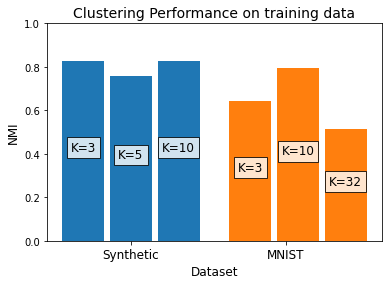

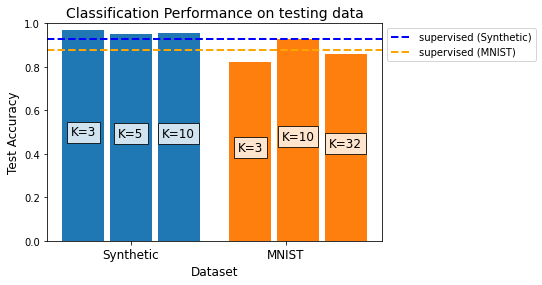

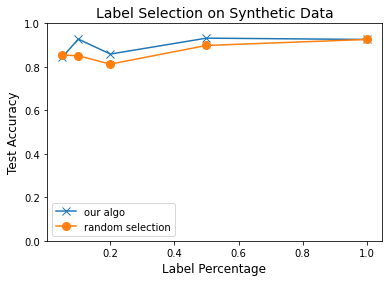

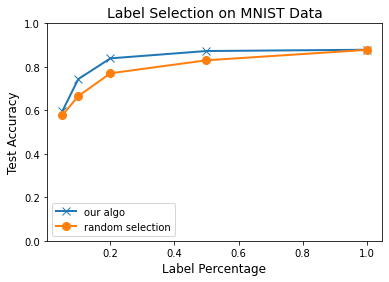

In [10]:
## TODO: Implement your solution and store the results in the following dictionaries
## Please note that the below values are given as an example to show the format, 
## you need to replace them with your values :)

# result1 = {'synthetic_test_accuracy':0.9, 'mnist_test_accuracy':0.85}

# result2 = {'synthetic':{'K':[3, 5, 10], 'clustering_nmi':[0.6,0.6,0.6], 'classification_accuracy':[0.8,0.8,0.8]},
#             'mnist':{'K':[3, 10, 32], 'clustering_nmi':[0.5,0.5,0.5], 'classification_accuracy':[0.7,0.7,0.7]}}
                                
# result3 = {'synthetic': {'label_percentage':[0.05,0.1,0.2,0.5,1], 'test_accuracy(our algo)':[0.5,0.6,0.7,0.8,0.9], 'test_accuracy(random)':[0.4,0.5,0.6,0.7,0.8]},
#             'mnist': {'label_percentage':[0.05,0.1,0.2,0.5,1], 'test_accuracy(our algo)':[0.5,0.5,0.7,0.7,0.7], 'test_accuracy(random)':[0.4,0.4,0.6,0.6,0.6]}}


plot_result(result1, result2, result3)

## Task 4.1 (Vary the size of data for supervised learning)

### Synthetic Data

In [31]:
result1 = {}
original_data = prepare_synthetic_data()

size_ratios = [1.0, 0.75, 0.5, 0.25, 0.1]
rng = np.random.default_rng(seed=0)
acc_syn_table = {}
for size_ratio in size_ratios:
    acc_list = []
    for seed in range(5):
        random_index = rng.choice(
            original_data['trainX'].shape[0], 
            int(original_data['trainX'].shape[0] * size_ratio), 
            replace=False, 
        )
        data = {
            'trainX': original_data['trainX'][random_index], 
            'trainY': original_data['trainY'][random_index], 
            'testX': original_data['testX'], 
            'testY': original_data['testY']
        }
        svm = MyClassifier(K=3, ensemble=True)
        svm.train(data['trainX'], data['trainY'])
        acc = svm.evaluate(data['testX'], data['testY'])
        acc_list.append(acc)

    acc_list = np.array(acc_list)
    result1[label] = np.mean(acc_list)
    acc_syn_table[size_ratio] = acc_list

====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======


/opt/homebrew/lib/python3.11/site-packages/cvxpy/reductions/solvers/solving_chain.py:336: FutureWarning: 
    Your problem is being solved with the ECOS solver by default. Starting in 
    CVXPY 1.5.0, Clarabel will be used as the default solver instead. To continue 
    using ECOS, specify the ECOS solver explicitly using the ``solver=cp.ECOS`` 
    argument to the ``problem.solve`` method.
    
  warnings.warn(ECOS_DEPRECATION_MSG, FutureWarning)
/opt/homebrew/lib/python3.11/site-packages/cvxpy/reductions/solvers/solving_chain.py:336: FutureWarning: 
    Your problem is being solved with the ECOS solver by default. Starting in 
    CVXPY 1.5.0, Clarabel will be used as the default solver instead. To continue 
    using ECOS, specify the ECOS solver explicitly using the ``solver=cp.ECOS`` 
    argument to the ``problem.solve`` method.
    
  warnings.warn(ECOS_DEPRECATION_MSG, FutureWarning)


====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======


/opt/homebrew/lib/python3.11/site-packages/cvxpy/reductions/solvers/solving_chain.py:336: FutureWarning: 
    Your problem is being solved with the ECOS solver by default. Starting in 
    CVXPY 1.5.0, Clarabel will be used as the default solver instead. To continue 
    using ECOS, specify the ECOS solver explicitly using the ``solver=cp.ECOS`` 
    argument to the ``problem.solve`` method.
    
  warnings.warn(ECOS_DEPRECATION_MSG, FutureWarning)
/opt/homebrew/lib/python3.11/site-packages/cvxpy/reductions/solvers/solving_chain.py:336: FutureWarning: 
    Your problem is being solved with the ECOS solver by default. Starting in 
    CVXPY 1.5.0, Clarabel will be used as the default solver instead. To continue 
    using ECOS, specify the ECOS solver explicitly using the ``solver=cp.ECOS`` 
    argument to the ``problem.solve`` method.
    
  warnings.warn(ECOS_DEPRECATION_MSG, FutureWarning)


====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======


/opt/homebrew/lib/python3.11/site-packages/cvxpy/reductions/solvers/solving_chain.py:336: FutureWarning: 
    Your problem is being solved with the ECOS solver by default. Starting in 
    CVXPY 1.5.0, Clarabel will be used as the default solver instead. To continue 
    using ECOS, specify the ECOS solver explicitly using the ``solver=cp.ECOS`` 
    argument to the ``problem.solve`` method.
    
  warnings.warn(ECOS_DEPRECATION_MSG, FutureWarning)
/opt/homebrew/lib/python3.11/site-packages/cvxpy/reductions/solvers/solving_chain.py:336: FutureWarning: 
    Your problem is being solved with the ECOS solver by default. Starting in 
    CVXPY 1.5.0, Clarabel will be used as the default solver instead. To continue 
    using ECOS, specify the ECOS solver explicitly using the ``solver=cp.ECOS`` 
    argument to the ``problem.solve`` method.
    
  warnings.warn(ECOS_DEPRECATION_MSG, FutureWarning)


====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======


/opt/homebrew/lib/python3.11/site-packages/cvxpy/reductions/solvers/solving_chain.py:336: FutureWarning: 
    Your problem is being solved with the ECOS solver by default. Starting in 
    CVXPY 1.5.0, Clarabel will be used as the default solver instead. To continue 
    using ECOS, specify the ECOS solver explicitly using the ``solver=cp.ECOS`` 
    argument to the ``problem.solve`` method.
    
  warnings.warn(ECOS_DEPRECATION_MSG, FutureWarning)
/opt/homebrew/lib/python3.11/site-packages/cvxpy/reductions/solvers/solving_chain.py:336: FutureWarning: 
    Your problem is being solved with the ECOS solver by default. Starting in 
    CVXPY 1.5.0, Clarabel will be used as the default solver instead. To continue 
    using ECOS, specify the ECOS solver explicitly using the ``solver=cp.ECOS`` 
    argument to the ``problem.solve`` method.
    
  warnings.warn(ECOS_DEPRECATION_MSG, FutureWarning)


====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======


/opt/homebrew/lib/python3.11/site-packages/cvxpy/reductions/solvers/solving_chain.py:336: FutureWarning: 
    Your problem is being solved with the ECOS solver by default. Starting in 
    CVXPY 1.5.0, Clarabel will be used as the default solver instead. To continue 
    using ECOS, specify the ECOS solver explicitly using the ``solver=cp.ECOS`` 
    argument to the ``problem.solve`` method.
    
  warnings.warn(ECOS_DEPRECATION_MSG, FutureWarning)
/opt/homebrew/lib/python3.11/site-packages/cvxpy/reductions/solvers/solving_chain.py:336: FutureWarning: 
    Your problem is being solved with the ECOS solver by default. Starting in 
    CVXPY 1.5.0, Clarabel will be used as the default solver instead. To continue 
    using ECOS, specify the ECOS solver explicitly using the ``solver=cp.ECOS`` 
    argument to the ``problem.solve`` method.
    
  warnings.warn(ECOS_DEPRECATION_MSG, FutureWarning)


====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======


/opt/homebrew/lib/python3.11/site-packages/cvxpy/reductions/solvers/solving_chain.py:336: FutureWarning: 
    Your problem is being solved with the ECOS solver by default. Starting in 
    CVXPY 1.5.0, Clarabel will be used as the default solver instead. To continue 
    using ECOS, specify the ECOS solver explicitly using the ``solver=cp.ECOS`` 
    argument to the ``problem.solve`` method.
    
  warnings.warn(ECOS_DEPRECATION_MSG, FutureWarning)
/opt/homebrew/lib/python3.11/site-packages/cvxpy/reductions/solvers/solving_chain.py:336: FutureWarning: 
    Your problem is being solved with the ECOS solver by default. Starting in 
    CVXPY 1.5.0, Clarabel will be used as the default solver instead. To continue 
    using ECOS, specify the ECOS solver explicitly using the ``solver=cp.ECOS`` 
    argument to the ``problem.solve`` method.
    
  warnings.warn(ECOS_DEPRECATION_MSG, FutureWarning)


====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======


/opt/homebrew/lib/python3.11/site-packages/cvxpy/reductions/solvers/solving_chain.py:336: FutureWarning: 
    Your problem is being solved with the ECOS solver by default. Starting in 
    CVXPY 1.5.0, Clarabel will be used as the default solver instead. To continue 
    using ECOS, specify the ECOS solver explicitly using the ``solver=cp.ECOS`` 
    argument to the ``problem.solve`` method.
    
  warnings.warn(ECOS_DEPRECATION_MSG, FutureWarning)
/opt/homebrew/lib/python3.11/site-packages/cvxpy/reductions/solvers/solving_chain.py:336: FutureWarning: 
    Your problem is being solved with the ECOS solver by default. Starting in 
    CVXPY 1.5.0, Clarabel will be used as the default solver instead. To continue 
    using ECOS, specify the ECOS solver explicitly using the ``solver=cp.ECOS`` 
    argument to the ``problem.solve`` method.
    
  warnings.warn(ECOS_DEPRECATION_MSG, FutureWarning)


====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======


/opt/homebrew/lib/python3.11/site-packages/cvxpy/reductions/solvers/solving_chain.py:336: FutureWarning: 
    Your problem is being solved with the ECOS solver by default. Starting in 
    CVXPY 1.5.0, Clarabel will be used as the default solver instead. To continue 
    using ECOS, specify the ECOS solver explicitly using the ``solver=cp.ECOS`` 
    argument to the ``problem.solve`` method.
    
  warnings.warn(ECOS_DEPRECATION_MSG, FutureWarning)
/opt/homebrew/lib/python3.11/site-packages/cvxpy/reductions/solvers/solving_chain.py:336: FutureWarning: 
    Your problem is being solved with the ECOS solver by default. Starting in 
    CVXPY 1.5.0, Clarabel will be used as the default solver instead. To continue 
    using ECOS, specify the ECOS solver explicitly using the ``solver=cp.ECOS`` 
    argument to the ``problem.solve`` method.
    
  warnings.warn(ECOS_DEPRECATION_MSG, FutureWarning)


====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======


/opt/homebrew/lib/python3.11/site-packages/cvxpy/reductions/solvers/solving_chain.py:336: FutureWarning: 
    Your problem is being solved with the ECOS solver by default. Starting in 
    CVXPY 1.5.0, Clarabel will be used as the default solver instead. To continue 
    using ECOS, specify the ECOS solver explicitly using the ``solver=cp.ECOS`` 
    argument to the ``problem.solve`` method.
    
  warnings.warn(ECOS_DEPRECATION_MSG, FutureWarning)
/opt/homebrew/lib/python3.11/site-packages/cvxpy/reductions/solvers/solving_chain.py:336: FutureWarning: 
    Your problem is being solved with the ECOS solver by default. Starting in 
    CVXPY 1.5.0, Clarabel will be used as the default solver instead. To continue 
    using ECOS, specify the ECOS solver explicitly using the ``solver=cp.ECOS`` 
    argument to the ``problem.solve`` method.
    
  warnings.warn(ECOS_DEPRECATION_MSG, FutureWarning)


====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======


/opt/homebrew/lib/python3.11/site-packages/cvxpy/reductions/solvers/solving_chain.py:336: FutureWarning: 
    Your problem is being solved with the ECOS solver by default. Starting in 
    CVXPY 1.5.0, Clarabel will be used as the default solver instead. To continue 
    using ECOS, specify the ECOS solver explicitly using the ``solver=cp.ECOS`` 
    argument to the ``problem.solve`` method.
    
  warnings.warn(ECOS_DEPRECATION_MSG, FutureWarning)
/opt/homebrew/lib/python3.11/site-packages/cvxpy/reductions/solvers/solving_chain.py:336: FutureWarning: 
    Your problem is being solved with the ECOS solver by default. Starting in 
    CVXPY 1.5.0, Clarabel will be used as the default solver instead. To continue 
    using ECOS, specify the ECOS solver explicitly using the ``solver=cp.ECOS`` 
    argument to the ``problem.solve`` method.
    
  warnings.warn(ECOS_DEPRECATION_MSG, FutureWarning)


====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======


/opt/homebrew/lib/python3.11/site-packages/cvxpy/reductions/solvers/solving_chain.py:336: FutureWarning: 
    Your problem is being solved with the ECOS solver by default. Starting in 
    CVXPY 1.5.0, Clarabel will be used as the default solver instead. To continue 
    using ECOS, specify the ECOS solver explicitly using the ``solver=cp.ECOS`` 
    argument to the ``problem.solve`` method.
    
  warnings.warn(ECOS_DEPRECATION_MSG, FutureWarning)
/opt/homebrew/lib/python3.11/site-packages/cvxpy/reductions/solvers/solving_chain.py:336: FutureWarning: 
    Your problem is being solved with the ECOS solver by default. Starting in 
    CVXPY 1.5.0, Clarabel will be used as the default solver instead. To continue 
    using ECOS, specify the ECOS solver explicitly using the ``solver=cp.ECOS`` 
    argument to the ``problem.solve`` method.
    
  warnings.warn(ECOS_DEPRECATION_MSG, FutureWarning)
/opt/homebrew/lib/python3.11/site-packages/cvxpy/reductions/solvers/solving_chain.py:336: Futu

====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======


/opt/homebrew/lib/python3.11/site-packages/cvxpy/reductions/solvers/solving_chain.py:336: FutureWarning: 
    Your problem is being solved with the ECOS solver by default. Starting in 
    CVXPY 1.5.0, Clarabel will be used as the default solver instead. To continue 
    using ECOS, specify the ECOS solver explicitly using the ``solver=cp.ECOS`` 
    argument to the ``problem.solve`` method.
    
  warnings.warn(ECOS_DEPRECATION_MSG, FutureWarning)


### MNIST Data

In [33]:
result1 = {}
original_data = prepare_mnist_data()

size_ratios = [1.0, 0.75, 0.5, 0.25, 0.1]
rng = np.random.default_rng(seed=0)
acc_mnist_table = {}
for size_ratio in size_ratios:
    acc_list = []
    for seed in range(1):
        random_index = rng.choice(
            original_data['trainX'].shape[0], 
            int(original_data['trainX'].shape[0] * size_ratio), 
            replace=False, 
        )
        data = {
            'trainX': original_data['trainX'][random_index], 
            'trainY': original_data['trainY'][random_index], 
            'testX': original_data['testX'], 
            'testY': original_data['testY']
        }
        svm = MyClassifier(K=3, ensemble=True)
        svm.train(data['trainX'], data['trainY'])
        acc = svm.evaluate(data['testX'], data['testY'])
        acc_list.append(acc)

    acc_list = np.array(acc_list)
    result1[label] = np.mean(acc_list)
    acc_mnist_table[size_ratio] = acc_list

====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======


/opt/homebrew/lib/python3.11/site-packages/cvxpy/reductions/solvers/solving_chain.py:336: FutureWarning: 
    Your problem is being solved with the ECOS solver by default. Starting in 
    CVXPY 1.5.0, Clarabel will be used as the default solver instead. To continue 
    using ECOS, specify the ECOS solver explicitly using the ``solver=cp.ECOS`` 
    argument to the ``problem.solve`` method.
    
  warnings.warn(ECOS_DEPRECATION_MSG, FutureWarning)


====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======


/opt/homebrew/lib/python3.11/site-packages/cvxpy/reductions/solvers/solving_chain.py:336: FutureWarning: 
    Your problem is being solved with the ECOS solver by default. Starting in 
    CVXPY 1.5.0, Clarabel will be used as the default solver instead. To continue 
    using ECOS, specify the ECOS solver explicitly using the ``solver=cp.ECOS`` 
    argument to the ``problem.solve`` method.
    
  warnings.warn(ECOS_DEPRECATION_MSG, FutureWarning)


====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======


/opt/homebrew/lib/python3.11/site-packages/cvxpy/reductions/solvers/solving_chain.py:336: FutureWarning: 
    Your problem is being solved with the ECOS solver by default. Starting in 
    CVXPY 1.5.0, Clarabel will be used as the default solver instead. To continue 
    using ECOS, specify the ECOS solver explicitly using the ``solver=cp.ECOS`` 
    argument to the ``problem.solve`` method.
    
  warnings.warn(ECOS_DEPRECATION_MSG, FutureWarning)


====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======


/opt/homebrew/lib/python3.11/site-packages/cvxpy/reductions/solvers/solving_chain.py:336: FutureWarning: 
    Your problem is being solved with the ECOS solver by default. Starting in 
    CVXPY 1.5.0, Clarabel will be used as the default solver instead. To continue 
    using ECOS, specify the ECOS solver explicitly using the ``solver=cp.ECOS`` 
    argument to the ``problem.solve`` method.
    
  warnings.warn(ECOS_DEPRECATION_MSG, FutureWarning)


====== Finish solving one SVM ======
====== Finish solving one SVM ======


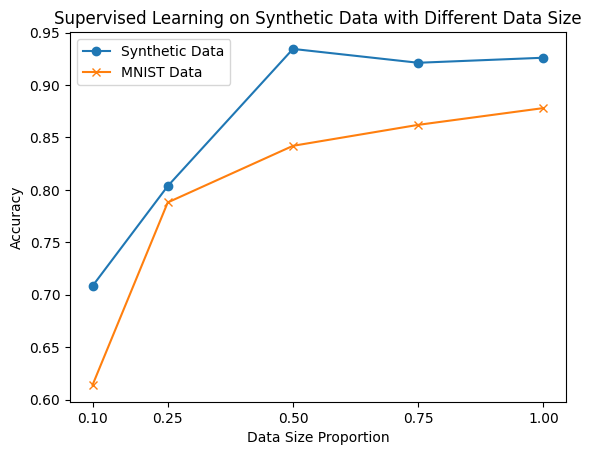

In [35]:
plt.figure()
plt.title("Supervised Learning on Synthetic Data with Different Data Size")
plt.xlabel("Data Size Proportion")
plt.ylabel("Accuracy")
plt.xticks(size_ratios)

plt.plot(size_ratios, [np.mean(acc_syn_table[size_ratio]) for size_ratio in size_ratios], marker="o", label="Synthetic Data")
plt.plot(size_ratios, [np.mean(acc_mnist_table[size_ratio]) for size_ratio in size_ratios], marker="x", label="MNIST Data")

plt.legend()